
---    
## Pipeline - First Draft
---   

**CS156: Finding Patterns in Data with Machine Learning**
    
**Prof. Watson**
    
**October 19, 2024**


------

## Section 1: Data Overview
---

When I hiked Mount Hallasan, the highest peak in South Korea, I also discovered another peak! My step count spiked to over 40,000 steps on October 10th! I noticed that my step count varied throughout the cities I have been to, and luckily, as someone who uses Apple devices except for my phone, I found that Samsung Health has tracked my step count since September 2022 alongside recording the time zones!

In other words, I have the cities I have been to and the corresponding step count. As a health-conscious individual who noticed their activity levels dipping when back home, I became curious about how different cities might be influencing my habits.

To satisfy this curiosity, I downloaded my personal data from the Samsung Health app in CSV format. There were multiple datasets; however, the most important ones were the dataset with my updated daily activity tracked in walking, running, step count, distance, and calories. I renamed this dataset to `day_summary.csv`. The second dataset included the different time zones indicating the cities I’ve visited and the corresponding time frame. I renamed this dataset to `cities.csv`.

These would allow me to explore patterns in my walking activity and see how different environments shape my daily routine.

### First Dataset: `cities.csv`
- **Columns Overview:**
  - `timezone`: Represents the timezone in the format *Continent/City*.
  - `start_date`: The timestamp for when the recorded data starts *in Unix timestamp (in milliseconds)*.
  - `update_time`: Time when the timezone was last updated in the format *date time*.
  - `create_time`: Time when the timezone record was created in the format *date time*.
  - `type`, `is_empty`, `version`: Metadata representing record categorization and versioning *(app-specific data)*.
  - `deviceuuid`: Device identifier used for recording data *(app-specific data)*.
  - `pkg_name`: Package name associated with the data collection app *(app-specific data)*.
  - `datauuid`: Unique identifier for the data record *(app-specific data)*.
  - `compressed_content`: Points to the locations of compressed JSON files.

### Second Dataset: `day_summary.csv`
- **Important Columns Overview:**
  - `step_count`: Total number of steps recorded in a day.
  - `active_time`: Duration of physical activity *(in milliseconds)*.
  - `update_time`: Time when the activity record was last updated in the format *date time*.
  - `create_time`: Time when the activity record was created in the format *date time*.
  - `distance`: Distance covered *(in meters)*.
  - `calorie`: Calories burned *(in Cal)*.
  - `run_time`: Time spent running *(in milliseconds)*.
  - `walk_time`: Time spent walking *(in milliseconds)*.
  - Other columns like `deviceuuid`, `pkg_name`, `day_time` track metadata and timestamps, along with app-specific data, such as `longest_active_time` and `longest_idle_time` to update daily streaks.

***The Data CSV Files can be accessed [here](https://github.com/Rawan-Khalifa/PIpeline_Step_City).***

### My Main Question about the data

**Did living in a city for at least 4 months influence my walking patterns?**

To explore this, I can test whether a model can accurately classify the city based on step count patterns:
- If the model achieves good classification accuracy, it suggests that distinct patterns exist, warranting further exploration of the contributing factors. 
- Conversely, if the model struggles to classify the city correctly, it implies that my walking pattern in this city may not have differed significantly from the city it was misclassified as.
----

## Section 2: Loading Data as DataFrame
---

In [1]:
# Ignore all warnings that may appear during execution
# ONLY ran before final code representation
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the files and removing the metadata line

import pandas as pd

def load_and_clean_csv(file_path, save_path):
    """
    This function loads a CSV file from the provided file path, 
    processes the file to remove metadata lines, and 
    ensures the data have a consistent structure before creating a DataFrame.
    The cleaned data is saved as a CSV file at the specified save path.
    
    Parameters:
    file_path (str): The path to the CSV file to be processed.
    save_path (str): The path where the cleaned CSV file will be saved.
    
    Returns:
    pd.DataFrame: The cleaned DataFrame.
    """
    # Read the raw lines of the file
    with open(file_path, 'r') as file:
        raw_lines = file.readlines()

    # Remove 1st metadata line, use 2nd line as the header
    cleaned_lines = raw_lines[1:]  
    header = cleaned_lines[0].strip().split(',')  
    data_lines = cleaned_lines[1:]  

    # Process each data line 
    processed_data = []

    # Loop through each data line
    # check if it matches the expected number of columns
    for line in data_lines:
        split_line = line.strip().split(',')
        
        # If there are extra fields, attempt to remove the last one
        if len(split_line) > len(header):
            split_line = split_line[:len(header)]
        
        # Append only if the row matches the expected column count
        if len(split_line) == len(header):
            processed_data.append(split_line)

    # Create the DataFrame using the cleaned data and header
    cleaned_df_corrected = pd.DataFrame(processed_data, columns=header)

    # Save the cleaned DataFrame to a CSV file at the specified save path
    cleaned_df_corrected.to_csv(save_path, index=False)

    # Extract the file name from the save path
    file_name = save_path.split('/')[-1]

    # Print the message with the file name
    print(f"File saved as: {file_name}")

    return cleaned_df_corrected

In [3]:
# Import the cities file
file_path = '/Downloads/Cities.csv'
save_path = '/Downloads/cleaned_cities.csv'

cities_df = load_and_clean_csv(file_path, save_path)
cities_df.head()

File saved as: cleaned_cities.csv


,timezone,start_date,update_time,create_time,type,is_empty,version,deviceuuid,content,pkg_name,datauuid,compressed_content
0,America/Los_Angeles,1662879600000,2022-09-18 20:28:48.440,2022-09-18 20:28:48.440,0,0,2,1Aysn0n5s3,X,com.sec.android.app.shealth,78143176-d761-4ebb-a6d3-73a69387bc37,78143176-d761-4ebb-a6d3-73a69387bc37.compresse...
1,America/Los_Angeles,1663484400000,2022-09-25 20:27:31.101,2022-09-25 20:27:31.101,0,0,2,1Aysn0n5s3,X,com.sec.android.app.shealth,22733dd0-5914-44a1-9da8-c5100b9faf18,22733dd0-5914-44a1-9da8-c5100b9faf18.compresse...
2,America/Los_Angeles,1664089200000,2022-10-02 20:31:46.115,2022-10-02 20:31:46.115,0,0,2,1Aysn0n5s3,X,com.sec.android.app.shealth,8410a86c-130e-46be-81ed-ce1541857edd,8410a86c-130e-46be-81ed-ce1541857edd.compresse...
3,America/Los_Angeles,1664694000000,2022-10-09 20:27:33.058,2022-10-09 20:27:33.058,0,0,2,1Aysn0n5s3,X,com.sec.android.app.shealth,05299e36-93b0-4c44-9bf1-1a0193d73cec,05299e36-93b0-4c44-9bf1-1a0193d73cec.compresse...
4,America/Los_Angeles,1665298800000,2022-10-16 20:27:36.925,2022-10-16 20:27:36.925,0,0,2,1Aysn0n5s3,X,com.sec.android.app.shealth,7d86659e-8ea9-4ac3-b70e-497f47cde1d0,7d86659e-8ea9-4ac3-b70e-497f47cde1d0.compresse...


In [4]:
# Import the day summary file
file_path = '/Downloads/day summary.csv'
save_path = '/Downloads/cleaned_day_summary.csv'
day_summary_df = load_and_clean_csv(file_path, save_path)
day_summary_df.head()

File saved as: cleaned_day_summary.csv


,movement_type,create_sh_ver,energy_type,exercise_time,step_count,exercise_calorie_target,active_time,target,others_time,modify_sh_ver,...,dynamic_active_time,calorie,extra_data,deviceuuid,run_time,pkg_name,walk_time,longest_idle_time,datauuid,day_time
0,,,,,4830,,3151318,90,0,,...,,185.80994,1bc1f2bc-0591-4f59-8f7c-e4c38d4b33c1.extra_dat...,1Aysn0n5s3,800,com.sec.android.app.shealth,3150518,48300000,1bc1f2bc-0591-4f59-8f7c-e4c38d4b33c1,1663459200000
1,,,,,0,,0,90,0,,...,,0.0,02dc11b6-d97f-41c6-bd2d-7e60ac82e016.extra_dat...,1Aysn0n5s3,0,com.sec.android.app.shealth,0,-1,02dc11b6-d97f-41c6-bd2d-7e60ac82e016,1661126400000
2,,,,,0,,0,90,0,,...,,0.0,7797f201-f0a5-429b-b104-5ccd18ce8ac5.extra_dat...,1Aysn0n5s3,0,com.sec.android.app.shealth,0,-1,7797f201-f0a5-429b-b104-5ccd18ce8ac5,1661212800000
3,,,,,0,,0,90,0,,...,,0.0,adc1c311-e281-4670-8182-5a4105b163fc.extra_dat...,1Aysn0n5s3,0,com.sec.android.app.shealth,0,-1,adc1c311-e281-4670-8182-5a4105b163fc,1661299200000
4,,,,,0,,0,90,0,,...,,0.0,f35639e6-26c8-435b-a68e-d95cc4924a40.extra_dat...,1Aysn0n5s3,0,com.sec.android.app.shealth,0,-1,f35639e6-26c8-435b-a68e-d95cc4924a40,1661385600000



## Section 3: PreProcessing and Exploratory Data Analysis
---


### Cleaning and preprocessing

#### Step 1: Filtering Columns
The most important columns were filtered as discussed below to only include `timezone`, `update_time` in the first dataset; and `step_count`, `active_time`, `update_time`, `distance`, `calorie`, `run_time`, `walk_time` in the second dataset. 

In [5]:
import pandas as pd

def reformat_files(file_col_map):
    """
    This function reformats multiple CSV files based on the provided column selection. 
    For each file in `file_col_map`, it keeps only the specified columns and 
    saves the reformatted files.

    Parameters:
    file_col_map (dict): A dictionary where the keys are file paths and the values 
                         are lists of column names to keep.

    Returns:
    None
    """
    # Loop through each file and its corresponding columns to keep
    for file_path, columns_to_keep in file_col_map.items():
        try:
            # Load the CSV file
            df = pd.read_csv(file_path)

            # Keep only the specified columns
            df = df[columns_to_keep]

            # Construct the new file path by appending '_reformatted' before the file extension
            new_file_path = file_path.replace(".csv", "_reformatted.csv")

            # Save the reformatted DataFrame to a new file
            df.to_csv(new_file_path, index=False)

            # Print the message with the file name
            print(f"Reformatted file saved as: {new_file_path.split('/')[-1]}")

        except Exception as e:
            print(f"An error occurred while processing {file_path.split('/')[-1]}: {e}")

In [6]:
# Cleaning the files
file_col_map = {
    "/Downloads/cleaned_cities.csv": ['timezone', 'update_time'],
    "/Downloads/cleaned_day_summary.csv": [
        'step_count',
        'active_time',
        'update_time',
        'distance',
        'calorie',
        'run_time',
        'walk_time']
}

reformat_files(file_col_map)

Reformatted file saved as: cleaned_cities_reformatted.csv
Reformatted file saved as: cleaned_day_summary_reformatted.csv


In [7]:
# Loading the cleaned_cities_reformatted dataset
re_cities_df = pd.read_csv('/Downloads/cleaned_cities_reformatted.csv')
re_cities_df.head()

,timezone,update_time
0,America/Los_Angeles,2022-09-18 20:28:48.440
1,America/Los_Angeles,2022-09-25 20:27:31.101
2,America/Los_Angeles,2022-10-02 20:31:46.115
3,America/Los_Angeles,2022-10-09 20:27:33.058
4,America/Los_Angeles,2022-10-16 20:27:36.925


In [8]:
# Loading the day summary_cleaned dataset
re_day_summary_df = pd.read_csv('/Downloads/cleaned_day_summary_reformatted.csv')
re_day_summary_df.head()

,step_count,active_time,update_time,distance,calorie,run_time,walk_time
0,4830,3151318,2022-09-19 06:45:46.964,3601.8887,185.80994,800,3150518
1,0,0,2022-09-18 20:23:45.304,0.0000,0.00000,0,0
2,0,0,2022-09-18 20:23:45.326,0.0000,0.00000,0,0
3,0,0,2022-09-18 20:23:45.359,0.0000,0.00000,0,0
4,0,0,2022-09-18 20:23:45.378,0.0000,0.00000,0,0


#### Step 2: Merging the DataFrames

To address the aforementioned question, both datasets need to be ***merged*** based on the `update_time` column. However, the shapes of the datasets, particularly the number of rows, are different *(112 in the cities dataset and 781 in the day summary dataset)*.

**Approach:**

1. **Removed cities that appeared only once:** Time zones that appeared only once in the cities data indicate that I was there between 1 to 3 days, therefore, will will disturb the forward fill process. *(Note: Even though only removing them from the cities dataset but not removing the corresponding rows from the day summary dataset won't have a significant impact on the data, but leaving them would result in filling more days with this label which is wrong)*

2. **Merged both DataFrames:** Merged `day_summary_df` and `filtered_cities_df` based on the *date* value of the `update_time` column in the `filtered_cities_df`.

3. **Forward-filled the time zones column:** Forward-filling ensures that if a particular row does not have a time zone value, it inherits the most recent time zone observed earlier in the DataFrame. This is especially useful as it helps fill gaps in this time series data with the most recent known information.

4. **Backward-filled remaining gaps:** Filled any remaining gaps by propagating the next known value upwards.

In [9]:
# Display the total number of rows in the cities dataframe
rows, columns = re_cities_df.shape
print(f'Total rows in cities dataframe: {rows}')

Total rows in cities dataframe: 112


In [10]:
# Display the total number of rows in the day summary dataframe
rows, columns = re_day_summary_df.shape
print(f'Total rows in day summary dataframe: {rows}')

Total rows in day summary dataframe: 781


In [11]:
# Calculate the count of each city (timezone)
city_counts = re_cities_df['timezone'].value_counts()

# Display the result
print(city_counts)

America/Los_Angeles               44
Africa/Cairo                      23
Asia/Seoul                        18
Europe/Berlin                     15
America/New_York                   5
America/Argentina/Buenos_Aires     5
Asia/Qatar                         1
Europe/Prague                      1
Name: timezone, dtype: int64


In [12]:
import pandas as pd

def filter_and_save_cities(cities_df, output_file):
    """
    This function filters cities that appear more than once in the 'timezone' column,
    and saves the filtered DataFrame to the specified output file.

    Parameters:
    cities_df (pd.DataFrame): The DataFrame containing the city (timezone) information.
    output_file (str): The file path where the filtered DataFrame will be saved.

    Returns:
    pd.DataFrame: The filtered DataFrame.
    """
    # Calculate the count of each city (timezone)
    city_counts = cities_df['timezone'].value_counts()

    # Filter out Cities that appear only once
    cities_to_keep = city_counts[city_counts > 1].index

    # Filter the original DataFrame to include only the selected cities
    filtered_cities_df = cities_df[cities_df['timezone'].isin(cities_to_keep)]

    # Save the filtered DataFrame to the provided file path
    filtered_cities_df.to_csv(output_file, index=False)

    print(f"Filtered DataFrame has been saved as: {output_file.split('/')[-1]}")

    return filtered_cities_df


file_path = '/Downloads/cleaned_cities_reformatted_filtered.csv'
filtered_cities_df = filter_and_save_cities(re_cities_df, file_path)

# Display 
filtered_cities_df.head()

Filtered DataFrame has been saved as: cleaned_cities_reformatted_filtered.csv


,timezone,update_time
0,America/Los_Angeles,2022-09-18 20:28:48.440
1,America/Los_Angeles,2022-09-25 20:27:31.101
2,America/Los_Angeles,2022-10-02 20:31:46.115
3,America/Los_Angeles,2022-10-09 20:27:33.058
4,America/Los_Angeles,2022-10-16 20:27:36.925


In [13]:
import pandas as pd

def fill_timezones_based_on_date_ranges(day_summary_df, filtered_cities_df, output_file):
    """
    This function merges the `day_summary_df` with `filtered_cities_df` based on the 'last_updated' column
    and forward-fills any missing values in the 'timezone' column.
    
    Parameters:
    day_summary_df (pd.DataFrame): The main DataFrame that needs timezones filled.
    cities_df (pd.DataFrame): The DataFrame containing valid timezones and 'update_time' dates.
    output_file (str): The file path to save the resulting DataFrame.
    
    Returns:
    pd.DataFrame: The merged DataFrame with forward-filled timezones.
    """
    # Convert 'update_time' to datetime format
    filtered_cities_df['update_time'] = pd.to_datetime(filtered_cities_df['update_time']).dt.date
    day_summary_df['update_time'] = pd.to_datetime(day_summary_df['update_time']).dt.date

    # Merge the `day_summary_df` with `filtered_cities_df` on the 'update_time' date
    merged_df = pd.merge(day_summary_df, filtered_cities_df[['update_time', 'timezone']], on='update_time', how='left')

    # Forward fill the gaps in the 'timezone' column
    merged_df['timezone'] = merged_df['timezone'].ffill()
    
    # Backward fill any remaining gaps in the 'timezone' column
    merged_df['timezone'] = merged_df['timezone'].bfill()

    # Step 4: Save the updated DataFrame with the forward-filled 'timezone' column
    merged_df.to_csv(output_file, index=False)
    
    print(f"Merged DataFrame has been saved as '{output_file.split('/')[-1]}'")
    
    return merged_df

# Example usage:
output_file = '/Downloads/merged_day_summary_with_timezones.csv'
merged_result = fill_timezones_based_on_date_ranges(re_day_summary_df, filtered_cities_df, output_file)


Merged DataFrame has been saved as 'merged_day_summary_with_timezones.csv'


In [14]:
#Marged df
step_city_df = pd.read_csv('/Downloads/merged_day_summary_with_timezones.csv')
step_city_df.head()

,step_count,active_time,update_time,distance,calorie,run_time,walk_time,timezone
0,4830,3151318,2022-09-19,3601.8887,185.80994,800,3150518,America/Los_Angeles
1,0,0,2022-09-18,0.0000,0.00000,0,0,America/Los_Angeles
2,0,0,2022-09-18,0.0000,0.00000,0,0,America/Los_Angeles
3,0,0,2022-09-18,0.0000,0.00000,0,0,America/Los_Angeles
4,0,0,2022-09-18,0.0000,0.00000,0,0,America/Los_Angeles


In [15]:
# Display the total number of rows in the step_city dataframe
rows, columns = step_city_df.shape
print(f'Total rows : {rows}')

# Check for missing values
missing_values = step_city_df.isnull().sum()
print( 'Total sum of missing values: \n',  missing_values)

Total rows : 781
Total sum of missing values: 
 step_count     0
active_time    0
update_time    0
distance       0
calorie        0
run_time       0
walk_time      0
timezone       0
dtype: int64


#### Step 3: Exploratory Data Analysis

- Exploring:
    - The data types 
    - Missing values
    - Class imbalance
    - Class Specific Trends
- Visualizations:
    - Box Plots
    - Scatter Plots
    - Histograms
    - Confusion Matrix

In [16]:
# Summary of the DataFrame
step_city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step_count   781 non-null    int64  
 1   active_time  781 non-null    int64  
 2   update_time  781 non-null    object 
 3   distance     781 non-null    float64
 4   calorie      781 non-null    float64
 5   run_time     781 non-null    int64  
 6   walk_time    781 non-null    int64  
 7   timezone     781 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 48.9+ KB


In [17]:
print("Summary Statistics (Numerical):")
step_city_df.describe() 

Summary Statistics (Numerical):


,step_count,active_time,distance,calorie,run_time,walk_time
count,781.000000,7.810000e+02,781.000000,781.000000,781.000000,7.810000e+02
mean,4614.755442,2.899817e+06,3487.507478,174.844762,2620.097311,2.897197e+06
std,4216.514112,2.616538e+06,3199.557938,160.048143,7279.864992,2.613678e+06
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,1245.000000,8.103450e+05,944.959960,47.090000,0.000000,8.103450e+05
50%,3902.000000,2.484425e+06,2939.078900,145.920000,0.000000,2.484425e+06
75%,6795.000000,4.303837e+06,5146.947300,258.039980,1852.000000,4.297128e+06
max,40721.000000,2.547302e+07,31085.096000,1514.588000,91985.000000,2.538669e+07


In [18]:
# Calculate the count of each city (timezone)
cities_counts = step_city_df['timezone'].value_counts()

# Display the result
print(cities_counts)

America/Los_Angeles               331
Africa/Cairo                      145
Asia/Seoul                        127
Europe/Berlin                     112
America/Argentina/Buenos_Aires     34
America/New_York                   32
Name: timezone, dtype: int64


**Observations:**
- There is a significant class imbalance, with `America/Argentina/Buenos_Aires` and `America/New_York` each appearing 34 times, indicating a time period of 2 months or less (based on observing the dates in the dataset).

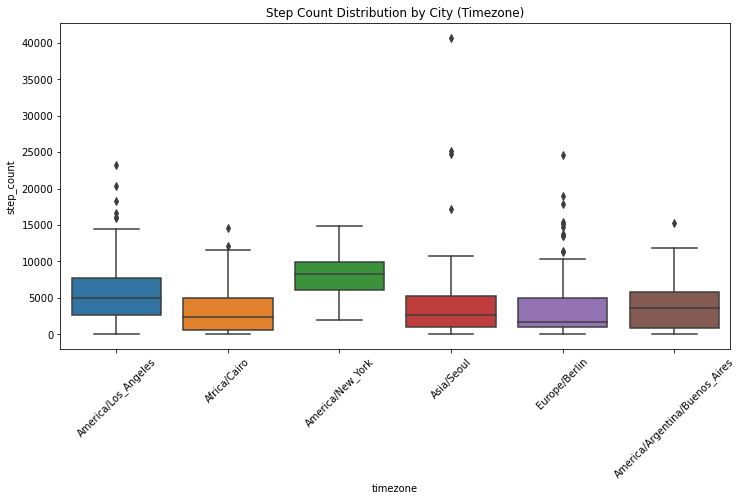

In [19]:
# Plot the step count distribution across different cities (timezones)
import matplotlib.pyplot as plt
import seaborn as sns

def plot_step_count_distribution(df):
    """
    Function to plot the distribution of step_count across different timezone groups
    """
    if 'step_count' in df.columns and 'timezone' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='timezone', y='step_count', data=df)
        plt.title("Step Count Distribution by City (Timezone)")
        plt.xticks(rotation=45)
        plt.show()
    else:
        print("The required columns ('step_count', 'timezone') are not present in the DataFrame.")

plot_step_count_distribution(step_city_df)

**Observations**

1. **Central Tendency**:
   - `America/New_York` appears to have a higher median step count compared to other time zones.
   - `Africa/Cairo` shows the lowest median step count.

2. **Spread and Variability**:
   - `America/Los_Angeles` has a larger interquartile range (IQR), indicating more variability in step counts.
   - `Europe/Berlin` has a relatively smaller IQR, suggesting that the step counts are more consistent within this group.

3. **Outliers**:
   - Several outliers are present in `America/Los_Angeles` and `Asia/Seoul`, indicating some days with exceptionally high step counts.
   - `America/Argentina/Buenos_Aires` also shows a few outliers, but they are less extreme.

4. **Distribution Shape**:
   - Most time zones exhibit a right-skewed distribution, with more frequent lower step counts and some higher outliers.

These noticeable differences in step count distributions among the time zones indicate varying levels of physical activity (or potential environmental/cultural factors) influencing daily activity.

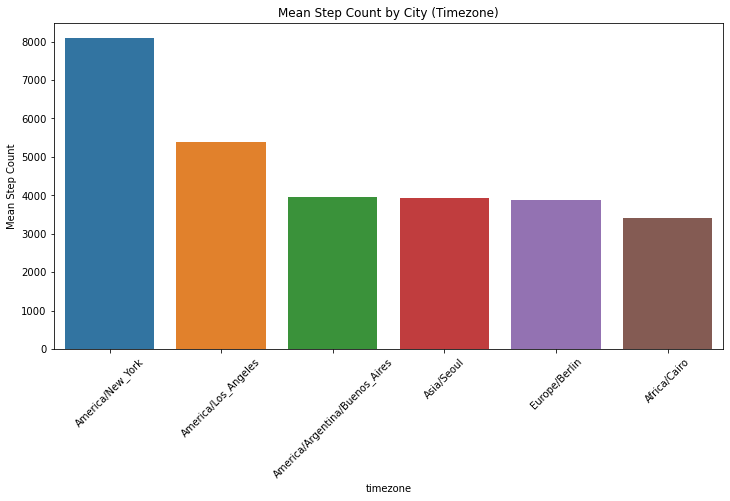

In [20]:
# Calculate and visualize the mean step count by city (timezone)
def plot_mean_step_count_by_city(df):
    if 'step_count' in df.columns and 'timezone' in df.columns:
        step_count_mean = df.groupby('timezone')['step_count'].mean().sort_values(ascending=False)

        plt.figure(figsize=(12, 6))
        sns.barplot(x=step_count_mean.index, y=step_count_mean.values)
        plt.title("Mean Step Count by City (Timezone)")
        plt.xticks(rotation=45)
        plt.ylabel("Mean Step Count")
        plt.show()
    else:
        print("The required columns ('step_count', 'timezone') are not present in the DataFrame.")

plot_mean_step_count_by_city(step_city_df)

**Observations**

- **New York** has the highest mean step count, followed by **Los Angeles**, while **Cairo** has the lowest.
- All remaining cities have a similar mean.
- This suggests that the overall mean won't be a sufficient metric to classify cities.

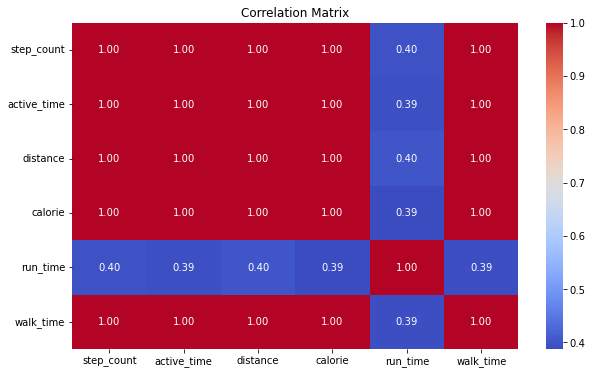

In [21]:
# Display correlation matrix for corr. between step count and other numerical features
def plot_correlation_matrix(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

plot_correlation_matrix(step_city_df)

**Observations**

1. **High Correlation Among Most Features**:
   - There is a perfect correlation (1.00) among `step_count`, `active_time`, `distance`, `calorie`, and `walk_time` since they are measuring redundant aspects of physical activity.

2. **Lower Correlation with `run_time`**:
   - `run_time` has a lower correlation (around 0.39 to 0.40) with the other features. This indicates that `run_time` is somewhat independent and may represent a different dimension of physical activity compared to the other features.

3. **Multicollinearity**:
   - The perfect correlation among most features suggests multicollinearity, which could affect the performance of the model. Therefore, I can utilize any one of these features and ignore the others.

As a result, `step_count` and potentially `run_time` could be used as features.

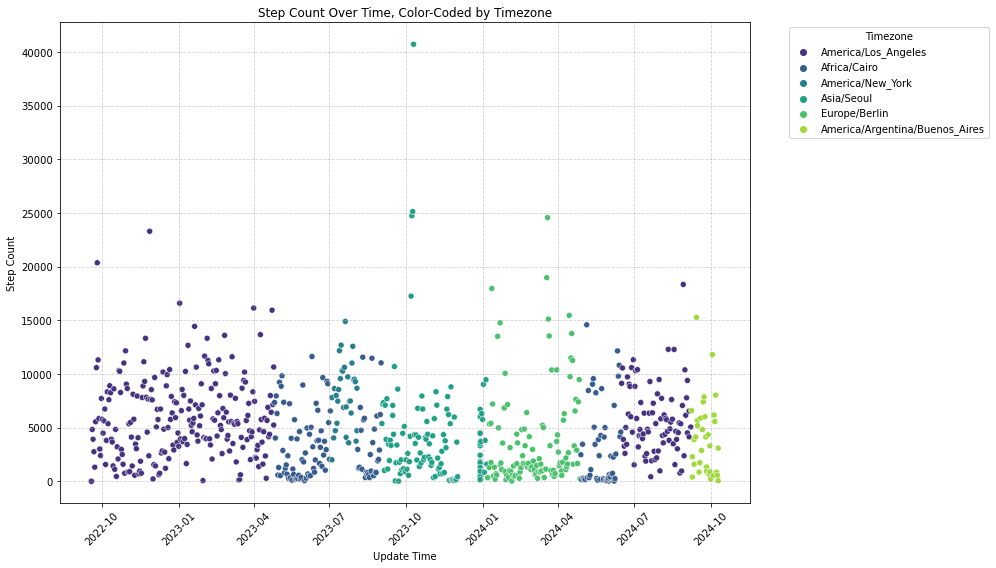

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'update_time' column to datetime format for proper plotting
step_city_df['update_time'] = pd.to_datetime(step_city_df['update_time'])

# Set the plot size
plt.figure(figsize=(14, 8))

# Create a scatter plot of step_count over time, color-coded by timezone
sns.scatterplot(x='update_time', y='step_count', hue='timezone', data=step_city_df, palette='viridis')

# Add title and labels
plt.title('Step Count Over Time, Color-Coded by Timezone')
plt.xlabel('Update Time')
plt.ylabel('Step Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Show the legend
plt.legend(title='Timezone', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

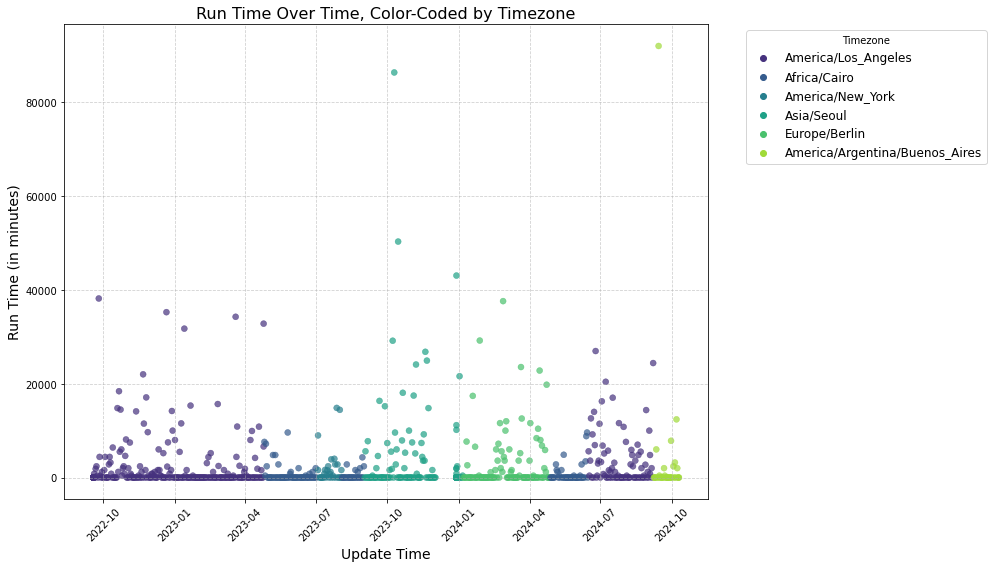

In [23]:
# Set the plot size for better readability
plt.figure(figsize=(14, 8))

# Create a scatter plot of walk_time over time, color-coded by timezone with transparency
sns.scatterplot(
    x='update_time', 
    y='run_time', 
    hue='timezone', 
    data=step_city_df, 
    palette='viridis', 
    alpha=0.7,  # Set transparency
    edgecolor=None  # Remove edge color to reduce clutter
)

# Add title and labels
plt.title('Run Time Over Time, Color-Coded by Timezone', fontsize=16)
plt.xlabel('Update Time', fontsize=14)
plt.ylabel('Run Time (in minutes)', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Show the legend outside the plot 
plt.legend(title='Timezone', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Show the plot 
plt.tight_layout()
plt.show()

**Observations**

- Both scatter plots reveal that the data points are distributed in a nearly similar way across different time zones.
- This overlap indicates that there is no clear separation between the classes based on individual data points, making it challenging to classify the time zones directly.
- Therefore, using raw data points may not be sufficient for accurate classification.
- To improve predictive power, it is essential to perform feature engineering.
- Features that capture trends and variations in step counts or activity levels over longer time spans will be selected; to extract more meaningful features that better distinguish between the different time zones.

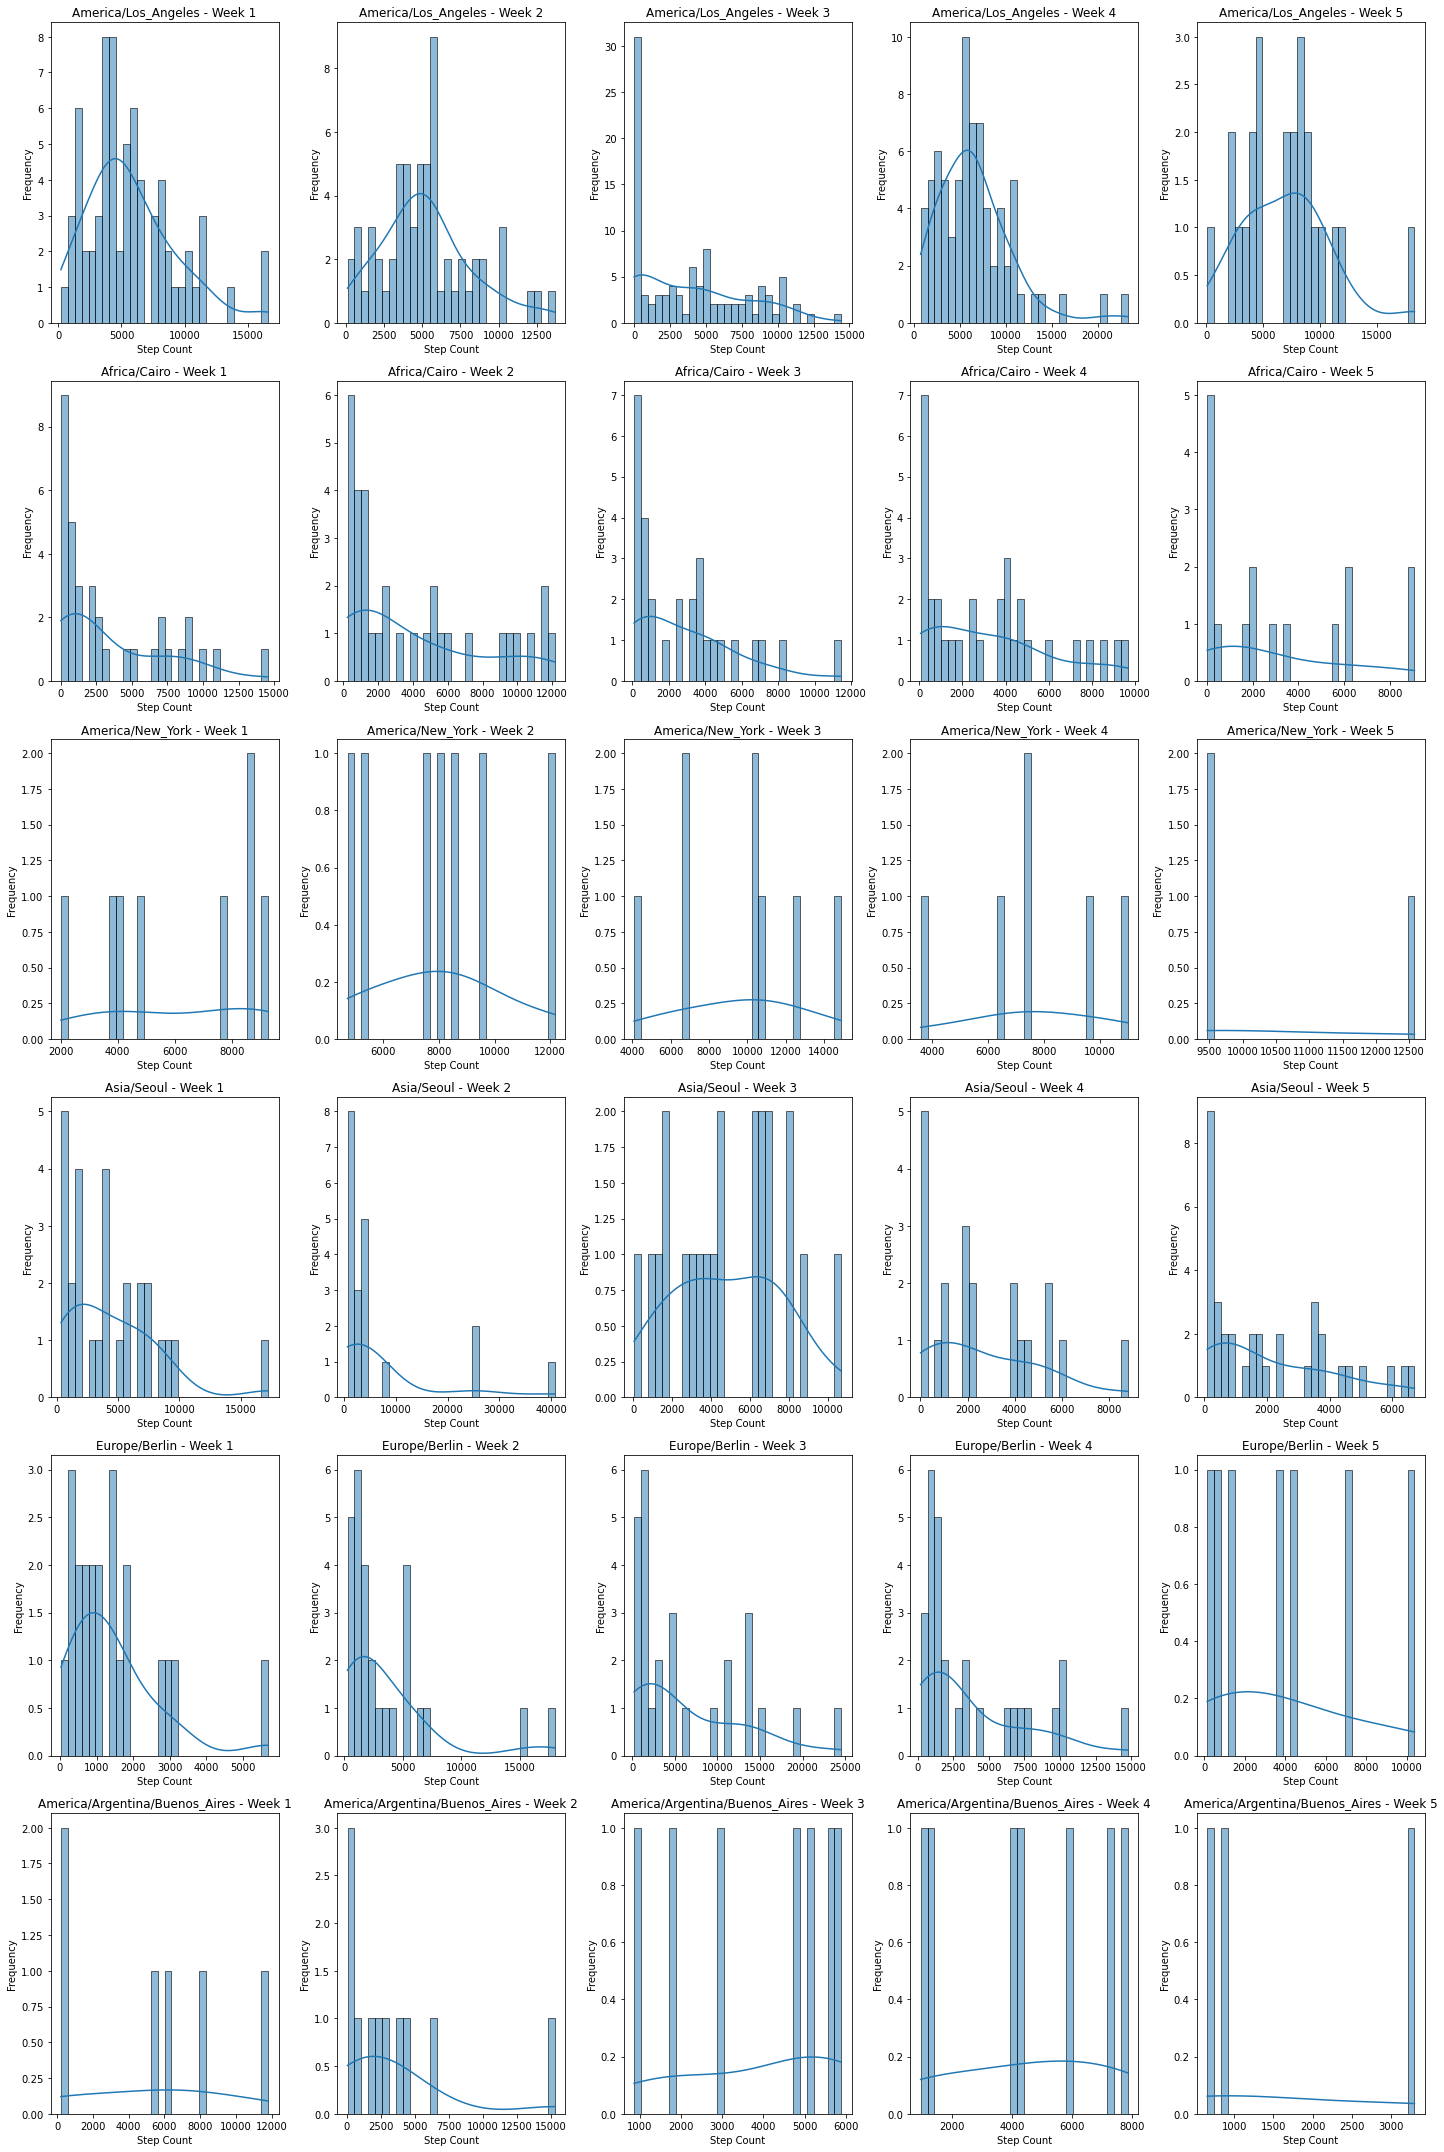

In [28]:
# Visualize Histograms for each city based on weekly aggregations

# Ensure the 'update_time' column is in datetime format
step_city_df['update_time'] = pd.to_datetime(step_city_df['update_time'], errors='coerce')

# Define the list of cities and weeks
cities = step_city_df['timezone'].unique()
weeks = range(1, 6)  # Assuming there are 5 weeks for analysis

# Plot the histograms
plt.figure(figsize=(20, len(cities) * 5))
plot_num = 1

# Iterate over each city and week to create histograms
for city in cities:
    for week in weeks:
        # Filter the data for the current city and week
        week_data = step_city_df[(step_city_df['timezone'] == city) & 
                                 (step_city_df['update_time'].dt.day <= week * 7) & 
                                 (step_city_df['update_time'].dt.day > (week - 1) * 7)]
        
        # Create a subplot for each city's weekly data
        plt.subplot(len(cities), len(weeks), plot_num)
        sns.histplot(data=week_data, x='step_count', bins=30, kde=True)
        plt.title(f'{city} - Week {week}')
        plt.xlabel('Step Count')
        plt.ylabel('Frequency')
        plot_num += 1

plt.tight_layout()
plt.show()

**Observations**

**Across all cities:**

1. **High Variability Across Weeks**:
   - The distributions differ significantly from week to week, indicating that using single data points would not capture the broader patterns. Aggregating the data over weeks might help smooth out these variations and reveal more stable trends.

2. **Sparse Data for Some Cities**:
   - For cities like `America/Argentina/Buenos_Aires` and `America/New_York`, the data is sparse, making it difficult to infer meaningful insights from individual days. 

3. **Fluctuating Activity Levels**:
   - The histograms illustrate that activity levels fluctuate over time. Capturing metrics such as weekly sums, means, and standard deviations might allow the model to learn the temporal patterns that are not evident from individual data points.

#### Step 4: Feature Engineering

Based on the observations above:
- Aggregating the data over weekly or monthly intervals is considered for tracking patterns over time.
- Performing the analysis on cities that have at least 4 months of tracked activity.

In [29]:
def feature_engineering_weekly_metrics(df, date_column, step_column, num_weeks=5):
    """
    Perform feature engineering on the step count data, creating weekly and statistical metrics 
    including weekly sums, means, and standard deviations.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing date and step count data.
    date_column (str): The column containing date information.
    step_column (str): The column containing step count data.
    num_weeks (int): The number of weeks to consider in the analysis (default is 5).

    Returns:
    pd.DataFrame: A DataFrame with weekly and statistical features.
    """
    # Convert the date column to datetime
    df[date_column] = pd.to_datetime(df[date_column])

    # Create a 'year_month' column for grouping
    df['year_month'] = df[date_column].dt.to_period('M')

    # Create a pivot table to get daily step counts as columns but without using date as index
    pivoted_data = df.pivot_table(
        index=['timezone', 'year_month'],  # Group by timezone and year-month
        columns=df[date_column].dt.day,  
        values=step_column,  
        aggfunc='sum'  # Aggregate by sum
    ).fillna(0)  # Fill missing values with 0

    # Define the weekly ranges (assumes 31 days max per month)
    days_in_week = 7
    for week in range(1, num_weeks + 1):
        start_day = (week - 1) * days_in_week
        end_day = min(week * days_in_week, 31)  # Limit to 31 days

        # Calculate weekly sum, mean, and standard deviation
        pivoted_data[f'week{week}_sum'] = pivoted_data.iloc[:, start_day:end_day].sum(axis=1)
        pivoted_data[f'week{week}_mean'] = pivoted_data.iloc[:, start_day:end_day].mean(axis=1)
        pivoted_data[f'week{week}_std'] = pivoted_data.iloc[:, start_day:end_day].std(axis=1)

    # Statistical features for the entire month
    pivoted_data['mean_steps'] = pivoted_data.iloc[:, :31].mean(axis=1)
    pivoted_data['std_steps'] = pivoted_data.iloc[:, :31].std(axis=1)

    # Drop original daily columns (optional) to keep only engineered features
    engineered_features = pivoted_data.drop(columns=pivoted_data.columns[:31])

    # Reset index to have 'timezone' and 'year_month' as columns
    engineered_features = engineered_features.reset_index()

    return engineered_features

engineered_features = feature_engineering_weekly_metrics(step_city_df, 'update_time', 'step_count')

# Display the engineered features
engineered_features


update_time,timezone,year_month,week1_sum,week1_mean,week1_std,week2_sum,week2_mean,week2_std,week3_sum,week3_mean,week3_std,week4_sum,week4_mean,week4_std,week5_sum,week5_mean,week5_std,mean_steps,std_steps
0,Africa/Cairo,2023-04,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,19328.0,2761.142857,3653.364086,6898.0,2299.333333,3492.328927,846.000000,2247.339998
1,Africa/Cairo,2023-05,39956.0,5708.000000,4008.512027,14082.0,2011.714286,2398.787382,12129.0,1732.714286,2229.178602,10191.0,1455.857143,1947.606431,12783.0,4261.000000,4079.478030,2875.516129,3199.923685
2,Africa/Cairo,2023-06,13497.0,1928.142857,2064.582882,24415.0,3487.857143,3913.208974,31006.0,4429.428571,1955.468559,30512.0,4358.857143,3618.856515,14556.0,4852.000000,4575.207973,3676.967742,3129.741901
3,Africa/Cairo,2023-07,8608.0,1229.714286,2468.820887,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,277.677419,1221.550828
4,Africa/Cairo,2023-08,12378.0,1768.285714,2498.203736,30213.0,4316.142857,3980.570622,17289.0,2469.857143,4029.034848,18617.0,2659.571429,2210.766900,11170.0,3723.333333,2206.094362,2892.483871,3139.578059
5,Africa/Cairo,2023-09,11031.0,1575.857143,4169.326102,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,355.838710,1981.226087
6,Africa/Cairo,2024-04,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2473.0,353.285714,934.706142,3602.0,1200.666667,1953.692999,195.967742,750.196840
7,Africa/Cairo,2024-05,23958.0,3422.571429,5804.965600,25618.0,3659.714286,4211.173816,18458.0,2636.857143,2941.797207,22460.0,3208.571429,3234.819823,596.0,198.666667,109.546033,2938.387097,3882.747821
8,Africa/Cairo,2024-06,14100.0,2014.285714,2376.138514,39703.0,5671.857143,5148.475840,4589.0,655.571429,1734.478967,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1883.612903,3452.434867
9,America/Argentina/Buenos_Aires,2024-09,0.0,0.000000,0.000000,34137.0,4876.714286,5235.278494,27026.0,3860.857143,3730.909783,32009.0,4572.714286,2806.228947,4836.0,1612.000000,2248.794566,3161.548387,3743.693282


**Observations**

Having only 2 datapoints for `America/Argentina/Buenos_Aires` and `America/New_York` won't be sufficient for training the model.

In [30]:
# Remove rows with timezone 'America/New_York' and 'America/Argentina/Buenos_Aires'
filtered_features = engineered_features[~engineered_features['timezone'].isin(['America/New_York', 'America/Argentina/Buenos_Aires'])]

#Intentionally displaying the whole df to check 
filtered_features



update_time,timezone,year_month,week1_sum,week1_mean,week1_std,week2_sum,week2_mean,week2_std,week3_sum,week3_mean,week3_std,week4_sum,week4_mean,week4_std,week5_sum,week5_mean,week5_std,mean_steps,std_steps
0,Africa/Cairo,2023-04,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,19328.0,2761.142857,3653.364086,6898.0,2299.333333,3492.328927,846.000000,2247.339998
1,Africa/Cairo,2023-05,39956.0,5708.000000,4008.512027,14082.0,2011.714286,2398.787382,12129.0,1732.714286,2229.178602,10191.0,1455.857143,1947.606431,12783.0,4261.000000,4079.478030,2875.516129,3199.923685
2,Africa/Cairo,2023-06,13497.0,1928.142857,2064.582882,24415.0,3487.857143,3913.208974,31006.0,4429.428571,1955.468559,30512.0,4358.857143,3618.856515,14556.0,4852.000000,4575.207973,3676.967742,3129.741901
3,Africa/Cairo,2023-07,8608.0,1229.714286,2468.820887,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,277.677419,1221.550828
4,Africa/Cairo,2023-08,12378.0,1768.285714,2498.203736,30213.0,4316.142857,3980.570622,17289.0,2469.857143,4029.034848,18617.0,2659.571429,2210.766900,11170.0,3723.333333,2206.094362,2892.483871,3139.578059
5,Africa/Cairo,2023-09,11031.0,1575.857143,4169.326102,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,355.838710,1981.226087
6,Africa/Cairo,2024-04,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2473.0,353.285714,934.706142,3602.0,1200.666667,1953.692999,195.967742,750.196840
7,Africa/Cairo,2024-05,23958.0,3422.571429,5804.965600,25618.0,3659.714286,4211.173816,18458.0,2636.857143,2941.797207,22460.0,3208.571429,3234.819823,596.0,198.666667,109.546033,2938.387097,3882.747821
8,Africa/Cairo,2024-06,14100.0,2014.285714,2376.138514,39703.0,5671.857143,5148.475840,4589.0,655.571429,1734.478967,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1883.612903,3452.434867
11,America/Los_Angeles,2022-09,0.0,0.000000,0.000000,0.0,0.000000,0.000000,11499.0,1642.714286,2135.339685,57960.0,8280.000000,6456.146503,10115.0,3371.666667,3950.235731,2566.903226,4609.055459


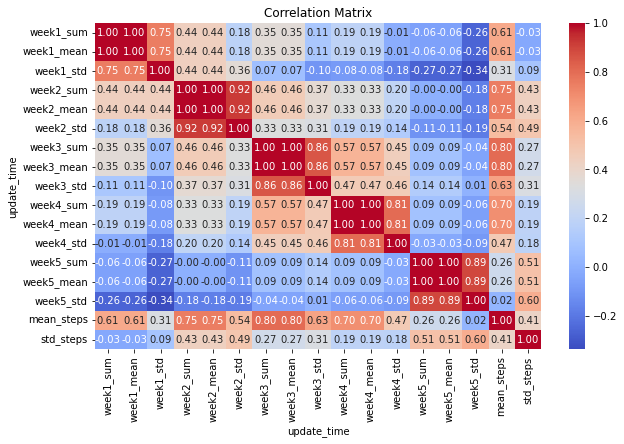

In [31]:
# Display correlation matrix for corr. between aggregated features
def plot_correlation_matrix(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

plot_correlation_matrix(filtered_features)

**Observations**

There is a strong correlation between the sums, means, and standard deviations of the data for the same weeks. Hence, considering a model that handles such cases would be a plus, as well as features that do not have strong collinearity.

## Section 4: Discussion of Classification Analysis 
---

1. **Perform Random Forest with All Features**:
   - The first step will involve training a Random Forest classifier *(with the default scikit-learn parameters)* using all the available features. This model will serve as the baseline to understand the overall predictive capability of the feature set, as Random Forest works well for ***multiclass categorical data*** by aggregating the predictions from multiple decision trees to provide a more robust and generalized model.
   - Evaluation metrics of accuracy, precision, recall, and F1 score will be used to assess the baseline model's performance.

2. **Use Feature Importance and Retrain the Model**:
   - Random Forest, as one of the ensemble methods, has embedded feature selection. Therefore, once the initial model is trained, feature importance scores will be calculated to determine which features contribute most to the classification task. Features with higher importance scores have a greater influence on the model's predictions.
   - The top features ***(trial and error between 2 and 6)*** will be selected based on their importance scores, and the Random Forest model will be retrained using only these selected features. This step aims to reduce the model's complexity and potentially improve generalization by focusing on the most relevant features.
   - The model's performance will again be compared with the baseline to see if reducing the feature set affects the evaluation metrics mentioned above.

3. **Apply Over/Undersampling Methods to Handle Class Imbalance**:
   - To handle class imbalance in the data, ***stratified sampling*** will be applied during train-test splitting to ensure that the distribution of time zones is maintained across both sets.
   - Because this is ***time series data***, other methods like the Synthetic Minority Over-sampling Technique ***(SMOTE)*** may not be suitable, as they could disrupt the inherent patterns in the data due to the temporal or sequential relationships.
   - Additional techniques such as ***balanced class weighting*** will be considered since weekly patterns could be fully preserved, allowing the model to adjust its learning process based on the imbalance.
   - The same steps (using all features and then using selected features) will be repeated with these resampling techniques to examine how they affect the model's performance.

In [32]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Random Forest pre and post Feature selection with/without class imbalance handling 

def run_random_forest(
    X, 
    y, 
    stratify=None, 
    class_weight=None, 
    feature_selection=True, 
    top_n_features=5
):
    """
    Train and evaluate a Random Forest classifier with options for feature selection
    and class balancing.
    
    Parameters:
        X (DataFrame): The input features.
        y (Series): The target variable.
        stratify (Series, optional): The variable to stratify the train-test split on.
        class_weight (dict, 'balanced', or None, optional): The class weight parameter for RandomForestClassifier.
        feature_selection (bool, optional): Whether to perform feature selection based on importance.
        top_n_features (int, optional): The number of top features to select if feature_selection is True.
    
    Returns:
        None: Prints accuracy and classification reports.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                        random_state=42, 
                                                        stratify=stratify)

    # Initialize and train the Random Forest Classifier with all features
    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight)
    rf.fit(X_train, y_train)

    # Make predictions and calculate accuracy before feature selection
    y_pred = rf.predict(X_test)
    initial_accuracy = accuracy_score(y_test, y_pred)
    print(f"Initial Model Accuracy with All Features: {initial_accuracy * 100:.2f}%")

    # Print the full classification report (precision, recall, F1-score, accuracy)
    print("\nClassification Report (All Features):")
    print(classification_report(y_test, y_pred))

    if feature_selection:
        # Get feature importances
        feature_importances = rf.feature_importances_

        # Create a DataFrame for visualization
        feature_importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': feature_importances
        })

        # Sort the DataFrame by importance
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Plot feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title('Feature Importance')
        plt.show()

        # Select the top N features
        top_features = feature_importance_df['Feature'].head(top_n_features)
        print(f"Top {top_n_features} Features: {list(top_features)}")

        # Rebuild the model using only the top N features
        X_train_top = X_train[top_features]
        X_test_top = X_test[top_features]

        # Train a new Random Forest Classifier using only the top N features
        rf_top = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight)
        rf_top.fit(X_train_top, y_train)

        # Make predictions and calculate accuracy with the top N features
        y_pred_top = rf_top.predict(X_test_top)
        top_accuracy = accuracy_score(y_test, y_pred_top)
        print(f"\nModel Accuracy with Top {top_n_features} Features: {top_accuracy * 100:.2f}%")

        # Print the full classification report for the model with the top N features
        print(f"\nClassification Report (Top {top_n_features} Features):")
        print(classification_report(y_test, y_pred_top))

    else:
        print("\nFeature selection was not applied.")

Running without class imbalance handling (No stratify, No class balancing)
Initial Model Accuracy with All Features: 44.44%

Classification Report (All Features):
                     precision    recall  f1-score   support

       Africa/Cairo       0.17      1.00      0.29         1
America/Los_Angeles       1.00      0.50      0.67         4
         Asia/Seoul       1.00      0.50      0.67         2
      Europe/Berlin       0.00      0.00      0.00         2

           accuracy                           0.44         9
          macro avg       0.54      0.50      0.40         9
       weighted avg       0.69      0.44      0.48         9



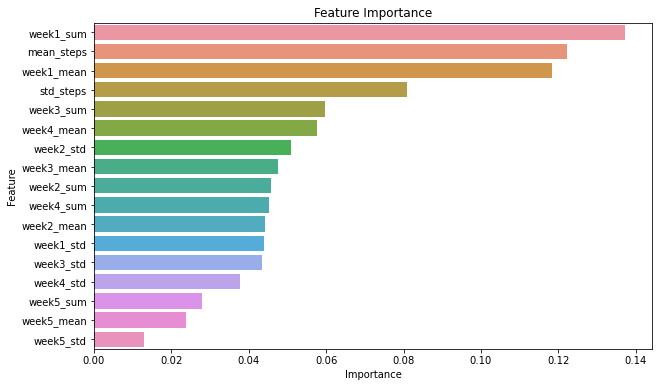

Top 5 Features: ['week1_sum', 'mean_steps', 'week1_mean', 'std_steps', 'week3_sum']

Model Accuracy with Top 5 Features: 55.56%

Classification Report (Top 5 Features):
                     precision    recall  f1-score   support

       Africa/Cairo       0.20      1.00      0.33         1
America/Los_Angeles       1.00      0.50      0.67         4
         Asia/Seoul       1.00      0.50      0.67         2
      Europe/Berlin       1.00      0.50      0.67         2

           accuracy                           0.56         9
          macro avg       0.80      0.62      0.58         9
       weighted avg       0.91      0.56      0.63         9



In [52]:
X = filtered_features.drop(['timezone', 'year_month'], axis=1)
y = filtered_features['timezone']

# Run Random Forest without class imbalance handling (No stratification, no class balancing)
print("Running without class imbalance handling (No stratify, No class balancing)")
run_random_forest(X, y, stratify=None, class_weight=None, feature_selection=True, top_n_features=5)

Running with class balancing (class_weight='balanced') 
Initial Model Accuracy with All Features: 55.56%

Classification Report (All Features):
                     precision    recall  f1-score   support

       Africa/Cairo       0.20      1.00      0.33         1
America/Los_Angeles       1.00      0.50      0.67         4
         Asia/Seoul       1.00      0.50      0.67         2
      Europe/Berlin       1.00      0.50      0.67         2

           accuracy                           0.56         9
          macro avg       0.80      0.62      0.58         9
       weighted avg       0.91      0.56      0.63         9



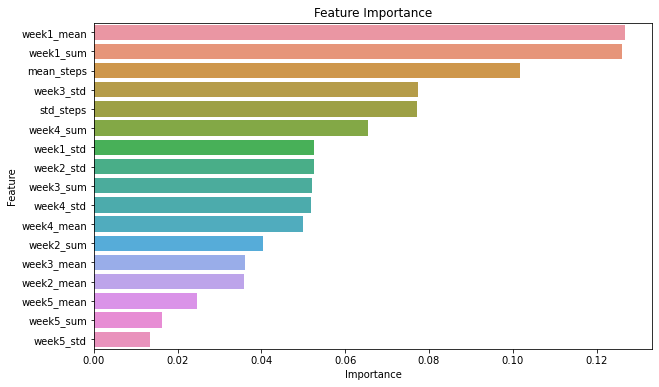

Top 5 Features: ['week1_mean', 'week1_sum', 'mean_steps', 'week3_std', 'std_steps']

Model Accuracy with Top 5 Features: 55.56%

Classification Report (Top 5 Features):
                     precision    recall  f1-score   support

       Africa/Cairo       0.20      1.00      0.33         1
America/Los_Angeles       1.00      0.50      0.67         4
         Asia/Seoul       1.00      0.50      0.67         2
      Europe/Berlin       1.00      0.50      0.67         2

           accuracy                           0.56         9
          macro avg       0.80      0.62      0.58         9
       weighted avg       0.91      0.56      0.63         9



In [53]:
# Run Random Forest with class balancing (class_weight='balanced')
print("Running with class balancing (class_weight='balanced') ")
run_random_forest(X, y, stratify=None, class_weight='balanced', feature_selection=True, top_n_features=5)

Running with stratification (Stratify on y) 
Initial Model Accuracy with All Features: 77.78%

Classification Report (All Features):
                     precision    recall  f1-score   support

       Africa/Cairo       1.00      1.00      1.00         3
America/Los_Angeles       0.67      1.00      0.80         4
         Asia/Seoul       0.00      0.00      0.00         1
      Europe/Berlin       0.00      0.00      0.00         1

           accuracy                           0.78         9
          macro avg       0.42      0.50      0.45         9
       weighted avg       0.63      0.78      0.69         9



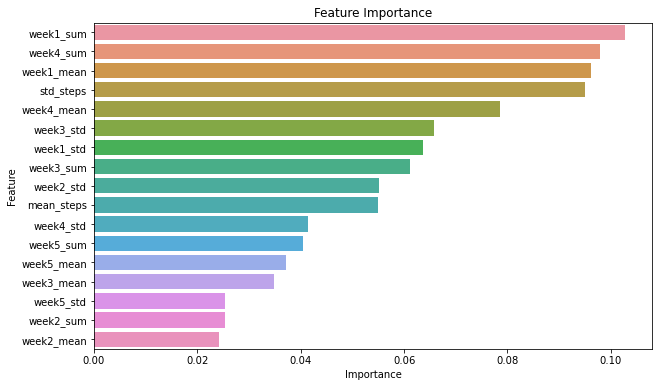

Top 5 Features: ['week1_sum', 'week4_sum', 'week1_mean', 'std_steps', 'week4_mean']

Model Accuracy with Top 5 Features: 88.89%

Classification Report (Top 5 Features):
                     precision    recall  f1-score   support

       Africa/Cairo       0.75      1.00      0.86         3
America/Los_Angeles       1.00      1.00      1.00         4
         Asia/Seoul       1.00      1.00      1.00         1
      Europe/Berlin       0.00      0.00      0.00         1

           accuracy                           0.89         9
          macro avg       0.69      0.75      0.71         9
       weighted avg       0.81      0.89      0.84         9



In [54]:
# Run Random Forest with stratification (stratifying the train-test split on y)
print("Running with stratification (Stratify on y) ")
run_random_forest(X, y, stratify=y, class_weight=None, feature_selection=True, top_n_features=5)

## Section 5: Model Selection and Hyperparameter Tuning 
---

For the three variations of the model, selecting the top 5 most important features based on their importance scores **improved** the model's accuracy in the cases of *No Class Imbalance Handling* and *Stratified Sampling* and **maintained** the model's accuracy in the case of *Balanced Class Weighting*. Therefore, the model could be simplified by reducing the number of features while maintaining and even improving its performance.

Utilizing both Stratified Sampling and Balanced Class Weighting to handle class imbalance, Stratified Sampling resulted in better performance, with an `accuracy of 89%` compared to `56%` for Balanced Class Weighting.

#### Comparison Between Models (Random Forest and SVM):

**Model Choice Rationale:**

***Random Forest***
   - This dataset might have non-linear boundaries between features, as different cities may exhibit varying step count patterns.
   - Additionally, Random Forest is robust to ***overfitting*** due to averaging across multiple decision trees, and it provides insights into feature importance.
   - Therefore, Random Forest would be effective for this multiclass categorical classification task.

***Support Vector Machine (SVM)***
   - The dataset is small, and finding a hyperplane that separates the classes well is important.
   - Since step patterns may vary in complex ways depending on city-specific factors, SVM could effectively find boundaries that separate different classes (cities) in the feature space.
   - With a proper choice of kernel (linear or RBF), SVM can model both linear and non-linear relationships in the data.

Since each model has unique strengths, I will apply both to identify which works best for this specific classification task.

#### Hyperparameter Tuning
   - Grid search will be used for hyperparameter tuning, performing an exhaustive search to find the optimal model parameters:
     - **Random Forest Hyperparameters**: Number of trees, maximum depth, and minimum samples for splitting.
     - **SVM Hyperparameters**: Kernel type (linear, RBF), regularization parameter (C), and kernel coefficient (gamma).
   
   - The tuned models will be evaluated using **accuracy** as the default metric for simplicity, and their performances will be compared to determine the best algorithm for this classification task.

Performing `GridSearch` with 5-fold cross-validation for hyperparameter tuning, the time complexity scales quadratically: $O(n^2)$, where $n$ is the number of samples, with SVM being the limiting factor.

Since the sample size is small $(n = 34)$, it is possible to simultaneously compare the models while performing cross-validation for each model's hyperparameters. 

Otherwise, it is preferable to start with model cross-validation, then choose the best model before proceeding with hyperparameter tuning for the selected model.

---
Detailed Time Complexity of `GridSearchCV` is given by the sum of the time complexities of the individual models:

$
\text{Total Time} = \sum (\text{Number of Combinations} \times \text{CV Folds} \times \text{Time Complexity of the Model Fit})
$

For each model:

- **Number of Folds (`cv`)**: $5$

***Random Forest***
- **Total Combinations of Hyperparameters**: $( 3 \times 3 \times 2 \times 2 = 36 $)
- **Time Complexity per Fit**: $O(n \cdot t \cdot \log(t))$, where $t$ is the number of trees.
- **Total Time Complexity**: $O(36 \times 5 \times n \cdot t \cdot \log(t))$

***SVM***
- **Total Combinations of Hyperparameters**: $( 2 \times 3 \times 2 = 12 $)
- **Time Complexity per Fit**: $O(n^2 \cdot d)$, where $d$ is the number of features.
- **Total Time Complexity**: $O(12 \times 5 \times n^2 \cdot d)$

The overall time complexity is dominated by the SVM model and with the model having 5 features $(d = 5)$, making it: $O(300 \times n^2)$ 

Thus, the overall time complexity for the Grid Search is approximately $O(n^2)$.

---

In [37]:
# Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

In [38]:
# Best feature combination
selected_features = ['week1_sum', 'week4_sum', 'week1_mean', 'std_steps', 'week4_mean']

X = filtered_features[selected_features]
y = filtered_features['timezone']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Define the models and their hyperparameters for tuning
models = {
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    }
}

# Iterate through the models
for model_name, model_data in models.items():
    print(f"\nTraining and tuning {model_name}...")
    
    # Initialize the model and the hyperparameter grid
    model = model_data['model']
    param_grid = model_data['params']
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)
    
    # Fit the model with the training data
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator and the best hyperparameters
    best_model = grid_search.best_estimator_
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    
    # Print the classification report
    print(f"\nClassification report for {model_name} with best hyperparameters:\n")
    print(classification_report(y_test, y_pred))


Training and tuning Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Classification report for Random Forest with best hyperparameters:

                     precision    recall  f1-score   support

       Africa/Cairo       0.75      1.00      0.86         3
America/Los_Angeles       1.00      1.00      1.00         4
         Asia/Seoul       1.00      1.00      1.00         1
      Europe/Berlin       0.00      0.00      0.00         1

           accuracy                           0.89         9
          macro avg       0.69      0.75      0.71         9
       weighted avg       0.81      0.89      0.84         9


Training and tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Classification report for SVM with best hyperpar

**Observations**

Random Forest performs better than SVM for this specific classification task, with an accuracy of `89%` for Random Forest compared to `78%` for SVM.

## Section 6: Model from Scratch and Mathematical Understanding 
---

   - A custom Random Forest model is implemented from scratch to better understand the mathematical principles behind it.
   - The model will include manual calculation of metrics using Gini impurity for splitting nodes, bootstrapping to generate samples for each tree, and aggregating predictions using majority voting.
----

### 1. Decision Trees: The Building Block of Random Forests
Since **decision trees** goal is to partition the dataset such that each partition (leaf node) is as "pure" as possible, they recursively split the data based on feature values. 

- **Splitting Criteria (Gini Impurity or Entropy)**:
  - The decision tree uses a metric like **Gini impurity** or **entropy** to evaluate the quality of a split.
  - The **Gini impurity** will be used here and is calculated as:
    $$
    \text{Gini} = 1 - \sum_{i=1}^{n} (p_i)^2
    $$
    where $( p_i )$ is the proportion of class $( i )$ in the dataset.
       
- **Choosing the Best Split**:
  - For each feature, all possible thresholds will be evaluated along with the **Gini impurity** for each split.
  - The goal is to find the feature and threshold that minimize the weighted sum of the impurities of the resulting partitions (left and right).

- **Stopping Criteria**:
  - The tree growth stops if:
    - Maximum depth is reached.
    - Number of samples in a node is below a specified minimum.
    - The split does not significantly reduce the impurity.

### 2. Random Forest: Combining Multiple Decision Trees
**Random Forest** builds an ensemble of decision trees and aggregates their predictions. Each tree is trained on a randomly selected subset of the data (bootstrap sample).

- **Bootstrap Sampling**:
  - For each tree, a new dataset is created by randomly sampling the original dataset **with replacement** (bootstrap sample).
  
- **Random Feature Selection (Feature Bagging)**:
  - For each split in the tree, only a random subset of features is considered; reducing correlation between the trees.
  
- **Aggregating Predictions**:
  - For classification tasks, the final prediction is made by **majority voting**. Each tree outputs a class, and the class with the most votes becomes the model's prediction.
  - For regression tasks, the predictions from each tree are averaged.

### 3. Implementation of Random Forest From Scratch:


#### a. Gini Impurity Calculation
The `_gini` method calculates the Gini impurity for a given split:
   $$
   \text{Gini} = \frac{n_{\text{left}}}{n_{\text{total}}} \times \text{Gini}_{\text{left}} + \frac{n_{\text{right}}}{n_{\text{total}}} \times \text{Gini}_{\text{right}}
   $$
Where:
- $( n_{\text{left}}) $ and $( n_{\text{right}} )$ are the number of samples in the left and right child nodes.
- $( n_{\text{total}}) $ is the total number of samples.
- $( \text{Gini}_{\text{left}})$ and $( \text{Gini}_{\text{right}})$ are the Gini impurities for the left and right child nodes.

For a set of labels, the Gini impurity is calculated as:
   $$
   \text{Gini}_{\text{node}} = 1 - \sum_{i=1}^{n} \left(\frac{\text{count of class } i}{\text{total samples in node}}\right)^2
   $$

#### b. Bootstrapping
The custom `RandomForest` class performs bootstrapping by randomly sampling the dataset with replacement, creating different datasets for training each decision tree.

#### c. Prediction Aggregation
In the `predict` method, predictions from each decision tree are collected, and the final prediction is made by taking the **mode** (most common value representing majority vote) of the predictions from all trees.


To ensure reproducibility a **random seed** was set hence the result of the random process (in this case: bootstrap sampling in the Random Forest) to be the same every time the code is run.


In [48]:
# TRYING TO BUILD A RANDOM FOREST FROM SCRATCH

# Set the seed for reproducibility
np.random.seed(77)

import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        # Stopping conditions
        if len(np.unique(y)) == 1 or len(y) < self.min_samples_split or depth == self.max_depth:
            return Counter(y).most_common(1)[0][0]

        # Find the best split
        feature, threshold = self._best_split(X, y)
        
        if feature is None:
            return Counter(y).most_common(1)[0][0]  # Leaf node if no valid split is found

        # Split the data
        left_indices = X[:, feature] < threshold
        right_indices = ~left_indices

        return {
            'feature': feature,
            'threshold': threshold,
            'left': self._build_tree(X[left_indices], y[left_indices], depth + 1),
            'right': self._build_tree(X[right_indices], y[right_indices], depth + 1)
        }

    def _best_split(self, X, y):
        # Implement Gini or Entropy here
        best_gini = float('inf')
        best_feature, best_threshold = None, None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices
                gini = self._gini(y[left_indices], y[right_indices])
                
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini(self, left, right):
        n_left = len(left)
        n_right = len(right)
        n_total = n_left + n_right

        def gini_impurity(labels):
            m = len(labels)
            return 1 - sum((np.sum(labels == c) / m) ** 2 for c in np.unique(labels))

        gini_left = gini_impurity(left)
        gini_right = gini_impurity(right)

        return (n_left / n_total) * gini_left + (n_right / n_total) * gini_right

    def predict(self, X):
        predictions = [self._predict_row(row) for row in X]
        return np.array(predictions)

    def _predict_row(self, row):
        node = self.tree
        while isinstance(node, dict):
            if row[node['feature']] < node['threshold']:
                node = node['left']
            else:
                node = node['right']
        return node


class RandomForest:
    def __init__(self, n_trees=100, max_depth=None, min_samples_split=5, min_samples_leaf=1, max_features=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_trees):
            # Bootstrap sampling
            indices = np.random.choice(len(X), size=len(X), replace=True)
            X_sample, y_sample = X[indices], y[indices]
            
            # Train tree on the bootstrap sample
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        # Aggregate predictions from all trees
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.array([Counter(predictions).most_common(1)[0][0] for predictions in tree_predictions.T])


# Use the engineered features for training
selected_features = ['week1_sum', 'week4_sum', 'week1_mean', 'std_steps', 'week4_mean']

X = filtered_features[selected_features].values
y = filtered_features['timezone'].values

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf = RandomForest(n_trees=10, max_depth=10)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.89%


## Section 7:  Evaluation Metrics 
---

Accuracy alone isn't a sufficient metric to capture false positives, false negatives, and the effect of class imbalance. Therefore, the following metrics were utilized:
   
### 4. Evaluation Metrics: Accuracy, Precision, Recall, F1 Score
- **Accuracy** measures the overall percentage of correctly classified instances:

  $$
  \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
  $$
  
  
- **Precision** indicates the proportion of correctly predicted positive observations to the total predicted positives:

  $$
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $$
  
  
- **Recall** measures the proportion of correctly predicted positives out of all actual positives:

  $$
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$
  
  
- **F1 Score** is the harmonic mean of precision and recall, providing a balance between the two:

  $$
  F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$


In [49]:
# Set the seed for reproducibility
np.random.seed(77)

def calculate_precision_recall_f1(y_true, y_pred):
    """
    Manually calculate precision, recall, and F1 score for a multi-class classification problem.

    Parameters:
    y_true (array-like): True class labels
    y_pred (array-like): Predicted class labels

    Returns:
    dict: Dictionary containing precision, recall, and F1 score for each class
    """
    # Get the unique classes
    classes = np.unique(y_true)
    
    # Initialize dictionaries to store precision, recall, and F1 for each class
    precision = {}
    recall = {}
    f1_score = {}
    
    # Calculate confusion matrix components for each class
    for cls in classes:
        # True positives, false positives, false negatives, true negatives
        TP = np.sum((y_true == cls) & (y_pred == cls))
        FP = np.sum((y_true != cls) & (y_pred == cls))
        FN = np.sum((y_true == cls) & (y_pred != cls))
        TN = np.sum((y_true != cls) & (y_pred != cls))

        # Precision calculation
        precision[cls] = TP / (TP + FP) if (TP + FP) > 0 else 0
        # Recall calculation
        recall[cls] = TP / (TP + FN) if (TP + FN) > 0 else 0
        # F1 Score calculation
        f1_score[cls] = (2 * precision[cls] * recall[cls]) / (precision[cls] + recall[cls]) if (precision[cls] + recall[cls]) > 0 else 0

    # Return the results as a dictionary
    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

# Manually calculate precision, recall, and F1 score
metrics = calculate_precision_recall_f1(y_test, y_pred)

# Display the precision, recall, and F1 score for each class
print("\nPrecision, Recall, and F1 Score for each class:")
for cls in metrics['precision'].keys():
    print(f"Class: {cls}")
    print(f"  Precision: {metrics['precision'][cls]:.2f}")
    print(f"  Recall: {metrics['recall'][cls]:.2f}")
    print(f"  F1 Score: {metrics['f1_score'][cls]:.2f}")
    print("-" * 30)


Precision, Recall, and F1 Score for each class:
Class: Africa/Cairo
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00
------------------------------
Class: America/Los_Angeles
  Precision: 0.80
  Recall: 1.00
  F1 Score: 0.89
------------------------------
Class: Asia/Seoul
  Precision: 1.00
  Recall: 1.00
  F1 Score: 1.00
------------------------------
Class: Europe/Berlin
  Precision: 0.00
  Recall: 0.00
  F1 Score: 0.00
------------------------------


## Section 8: Results Discussion & Visualization 
---

Utilizing the top 5 features along with stratified sampling to build the Random Forest classification model generated the following results:

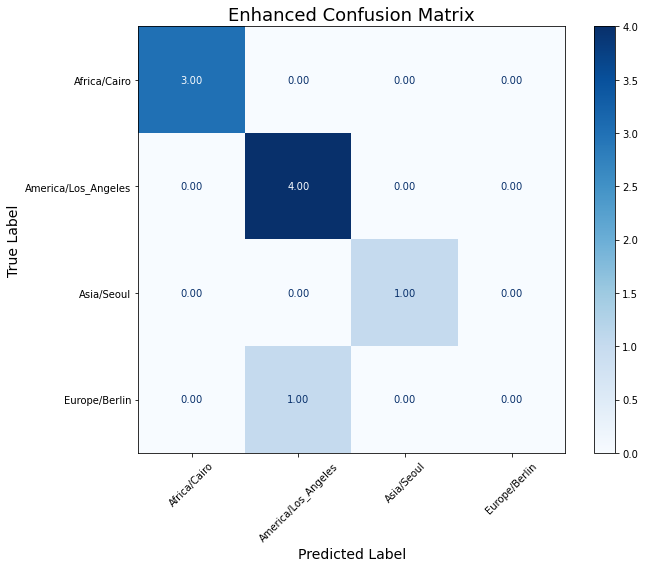

In [55]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get the unique class labels from the dataset
class_labels = np.unique(y_test)

# Plot the confusion matrix 
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(cm, display_labels=class_labels)
disp.plot(
    cmap='Blues',                       
    values_format='.2f',                
    ax=plt.gca(),                       
    xticks_rotation=45                  
)

# Add title and labels 
plt.title('Enhanced Confusion Matrix', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent overlap

# Show the plot
plt.show()

***Per-Class Performance Metrics:***

*(Note: These results are based on the sklearn RandomForestClassifier utilized earlier)*

1. **Africa/Cairo**:
   - **Precision: 0.75**: Of all instances predicted as "Africa/Cairo," 75% were correctly classified.
   - **Recall: 1.00**: The model successfully identified all actual "Africa/Cairo" instances (100% recall).
   - **F1-score: 0.86**: This metric, which balances precision and recall, is 0.86, indicating good performance in correctly identifying "Africa/Cairo."
   - **Support: 3**: There were 3 actual instances of the "Africa/Cairo" class in the test set.

2. **America/Los_Angeles**:
   - **Precision: 1.00**: The model perfectly predicted all instances of "America/Los_Angeles" with no false positives.
   - **Recall: 1.00**: The model also correctly identified all true "America/Los_Angeles" instances (100% recall).
   - **F1-score: 1.00**: A perfect F1-score indicates excellent classification for this class.
   - **Support: 4**: There were 4 true instances of "America/Los_Angeles" in the test set.

3. **Asia/Seoul**:
   - **Precision: 1.00**: The model perfectly predicted the single instance of "Asia/Seoul."
   - **Recall: 1.00**: The model correctly identified the only instance of "Asia/Seoul" in the test set.
   - **F1-score: 1.00**: With only one sample, the model achieved perfect precision and recall.
   - **Support: 1**: There was 1 instance of "Asia/Seoul" in the test set.

4. **Europe/Berlin**:
   - **Precision: 0.00**: The model did not correctly classify any instances of "Europe/Berlin."
   - **Recall: 0.00**: The model failed to identify the only instance of "Europe/Berlin" in the test set.
   - **F1-score: 0.00**: Both precision and recall are zero, resulting in an F1-score of zero for this class.
   - **Support: 1**: There was 1 instance of "Europe/Berlin" in the test set.

***Overall Performance Metrics:***
- **Accuracy: 0.89 (89%)**: The model correctly classified 89% of all instances in the test set.
- **Macro Average**:
   - **Precision: 0.69**, **Recall: 0.75**, **F1-score: 0.71**: These are the unweighted averages across all classes, indicating that the model's performance varies across classes. The lower scores for the macro average suggest that performance on some classes (e.g., "Europe/Berlin") drags down the average.
- **Weighted Average**:
   - **Precision: 0.81**, **Recall: 0.89**, **F1-score: 0.84**: These averages account for the number of instances in each class, thus weighting the scores more heavily for classes with more samples. This results in higher averages than the macro average, reflecting better performance on the more frequently occurring classes.

- Overall, the model performs well for ***"America/Los_Angeles" and "Africa/Cairo"*** but struggles with ***"Europe/Berlin" or "Asia/Seoul."*** This could be due to:
   - The small number of instances (only 1 sample), making it challenging for the model to learn from such limited data.
   - The walking patterns in Berlin or Seoul may have similar aspects to those of "Africa/Cairo" or "America/Los_Angeles" when it comes to the walking patterns in the first and fourth weeks of the month (based on model features) and the variation in walking activity throughout the month (from model features).

- The lower macro average compared to the weighted average highlights the imbalance in the class distribution, where some classes have more instances than others, affecting the overall performance metrics.
- Cross-validation will further assess the model's reliability given the small sample size.

In [56]:
# Using Cross Validation, it seems like we have progress! Great Job Roro! You got this!

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Use the previously selected top 5 features (replace this with the actual top 5 if known)
selected_features = ['week1_sum', 'week4_sum', 'week1_mean', 'std_steps', 'week4_mean']

X = filtered_features[selected_features]
y = filtered_features['timezone']

# Perform cross-validation using the top 5 selected features
X_top5 = X[selected_features]

# Initialize Stratified K-Fold for cross-validation,
# ensuring each fold maintains the class distribution.
#using n_split = 3 since the least populated class in y has only 4 members
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(max_depth= None, min_samples_leaf=1, min_samples_split= 5, n_estimators=100, random_state=42)

# Perform cross-validation with the top 5 features
cv_scores_top5 = cross_val_score(rf, X_top5, y, cv=stratified_kfold, scoring='accuracy')

# Output the cross-validation results
print(f"Cross-Validation Accuracy Scores with Top 5 Features: {cv_scores_top5}")
print(f"Mean Accuracy with Top 5 Features: {np.mean(cv_scores_top5) * 100:.2f}%")
print(f"Standard Deviation with Top 5 Features: {np.std(cv_scores_top5) * 100:.2f}%")


Cross-Validation Accuracy Scores with Top 5 Features: [0.7 0.5 0.8]
Mean Accuracy with Top 5 Features: 66.67%
Standard Deviation with Top 5 Features: 12.47%


***Stratified k-fold Cross-Validation***  
By observing the results across all folds, cross-validation provides insights into how well the model generalizes to different data subsets and assesses its stability.

A 14% standard deviation in cross-validation results indicates ***moderate to high variability,*** suggesting that the model's performance is inconsistent across different folds. This level of deviation implies that the model's accuracy ***fluctuates significantly*** depending on the specific subset of data used for training and testing.

The significantly higher accuracy of **89%** observed earlier, compared to the cross-validation mean, indicates that the model may be ***overfitting*** to the specific training set used in this split.

## Section 9: Executive Summary
---

This machine learning report outlines a classification task aiming to classify the city based on walking activity data recorded across multiple time zones. The analysis involves two datasets: one with daily step counts and related activity metrics, and another with corresponding time zones, reflecting different cities I visited. The goal is to explore whether living in a city for at least four months influences walking patterns and to build a model that can classify the city based on these patterns.

### Pipeline Overview

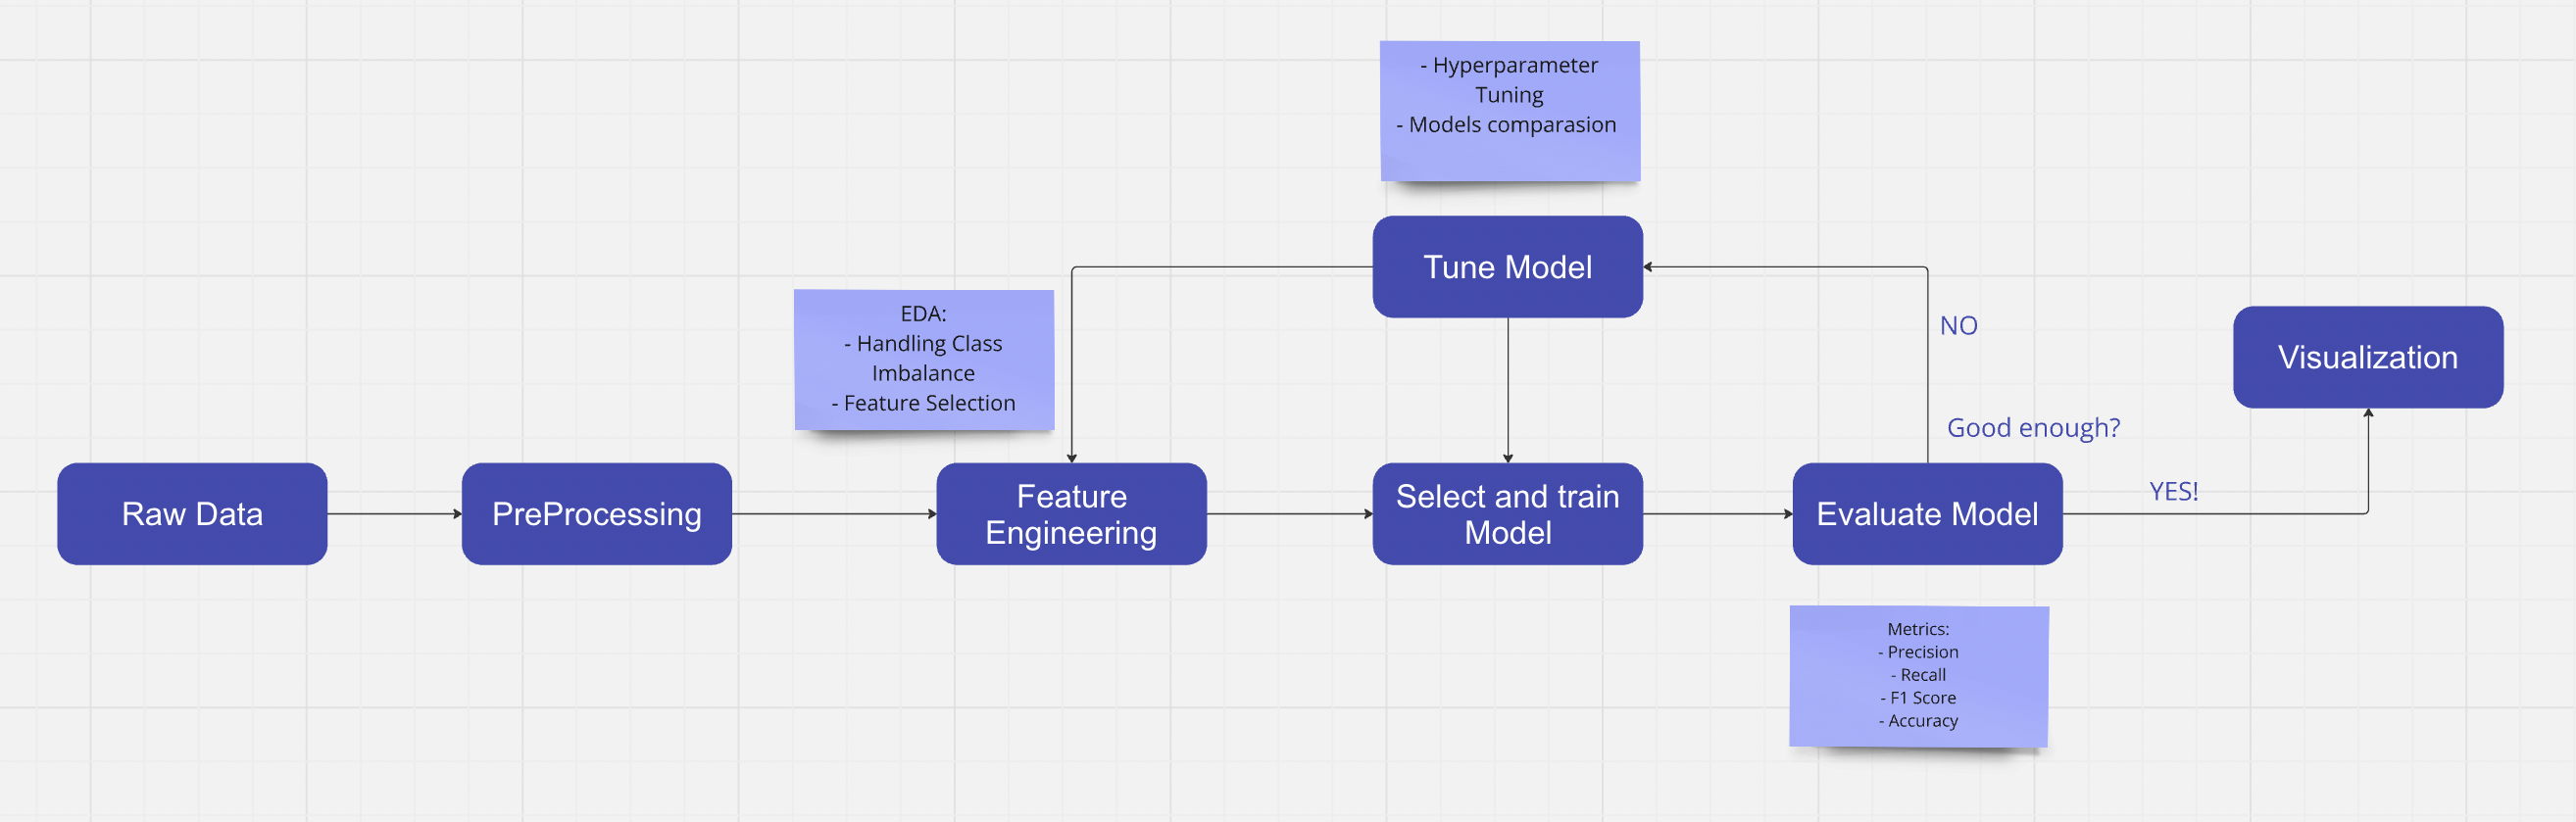

The machine learning pipeline consists of the following key steps:

1. **Data Preparation:**
   - Merging two datasets (`day_summary.csv` and `cities.csv`) based on the date field to align step count data with the corresponding time zone.
   - Handling missing values using forward and backward filling techniques to fill gaps in the time zone data.
   - Filtering out cities with insufficient data (less than a week), resulting in a more reliable dataset for analysis.

2. **Feature Engineering:**
   - Aggregating data over weekly intervals to smooth out day-to-day variations and reveal stable patterns.
   - Computing features such as the sum, mean, and standard deviation of step counts, active time, and other metrics to capture longer-term activity trends.
   - Reducing dimensionality by selecting the top 5 features based on their importance scores in the Random Forest model.

3. **Modeling:**
   - Building classification models using Random Forest and Support Vector Machine (SVM) algorithms to predict the city.
   - Performing hyperparameter tuning via grid search with cross-validation to optimize model parameters.
   - Addressing class imbalance by employing stratified sampling and evaluating alternative approaches such as balanced class weighting.

4. **Evaluation and Cross-Validation:**
   - Evaluating model performance using accuracy, precision, recall, and F1-score.
   - Applying stratified k-fold cross-validation to assess the model's generalization and stability.

### Key Results

- **Random Forest Performance:** The Random Forest classifier achieved an accuracy of 89% in the initial evaluation, significantly outperforming SVM (78%). The model showed good performance for classes like "America/Los_Angeles" and "Africa/Cairo," where enough data was available, achieving perfect precision and recall for "America/Los_Angeles."
- **Class Imbalance Impact:** Classes with fewer instances, such as "Europe/Berlin" or "Asia/Seoul," had lower performance, with precision and recall dropping to zero for "Europe/Berlin." The cross-validation process revealed a 14% standard deviation in results, indicating moderate to high variability in model performance across different data subsets.
- **Model Overfitting:** The discrepancy between the 89% accuracy in the initial evaluation and the lower mean accuracy during cross-validation suggests potential overfitting to the specific training set used in the first evaluation.

### Insights and Shortcomings

1. **Model Stability:** The model exhibits instability, with performance fluctuating across different data splits due to the small sample size and class imbalance. The high standard deviation in cross-validation highlights this inconsistency.
2. **Class Imbalance:** The imbalance in the class distribution, with underrepresented classes like "Europe/Berlin" and "Asia/Seoul," negatively impacts the model's ability to generalize across all classes. The lack of data for these classes makes it challenging to learn distinct patterns.
3. **Feature Engineering Limitations:** While aggregating data and selecting top features helped reduce noise, the features may not fully capture the underlying differences in walking patterns across cities. Incorporating additional metrics, such as weather data, cultural activity levels, or incorporating GPS-derived walking paths, could enhance the feature set and provide more context.

### Recommendations for Model Improvement

1. **Increase Training Data:** Collecting more data isn't applicable but oversampling techniques could be further explored for underrepresented classes like "Europe/Berlin" and "Asia/Seoul". Increasing the number of instances would help reduce variability and improve stability in cross-validation results.
2. **Class Balancing Techniques:** Techniques such as oversampling, undersampling, or synthetic data generation (e.g., SMOTE) could help balance the class distribution, leading to more equitable learning across all classes. Care must be taken with time series data to avoid disrupting temporal patterns.
3. **Advanced Feature Engineering:** Expanding the feature set to include additional factors like seasonal trends, socio-cultural events, or even integrating data from wearable devices tracking different types of physical activity (e.g., cycling, gym exercises) could capture a broader range of influences on walking patterns.
4. **Regularization Techniques:** Applying regularization methods such as L1/L2 penalties in model training could help reduce overfitting by constraining the model complexity.
5. **Alternative Models:** Exploring other algorithms like Gradient Boosting Machines (GBMs), XGBoost, or ensemble techniques combining Random Forest and SVM could potentially yield better classification results.
6. **Temporal Analysis Techniques:** Leveraging time series models or recurrent neural networks (RNNs) or Long-Short Term Memory (LSTM) could better capture sequential dependencies in walking patterns across different cities and help with the task of prediction rather than just classification.

### Conclusion

While the current Random Forest model demonstrates reasonable predictive performance, addressing the issues of model stability, class imbalance, and limited features could substantially improve results. By increasing training data, applying class balancing techniques, and expanding the feature set, the model can be made more robust and reliable for classifying walking patterns across different cities.

Well, it seems like Berlin's gloomy weather didn't have a strong influence on my walking activity, but rather on my mental health *(intrinsic silent pain)*.

## Section 10: References
---

- Agarwal, R. (n.d.). *Multiclass classification using random forest on scikit-learn library*. Codementor. Retrieved from https://www.codementor.io/@agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu

- Capital One Tech. (2019, June 18). *Random forest algorithm for machine learning*. Medium. Retrieved from https://medium.com/capital-one-tech/random-forest-algorithm-for-machine-learning-c4b2c8cc9feb

- Enozeren, E. (2019, June 24). *Building a random forest model from scratch*. Medium. Retrieved from https://medium.com/@enozeren/building-a-random-forest-model-from-scratch-81583cbaa7a9

- GeeksforGeeks. (n.d.-a). *Deep learning: Introduction to long short-term memory*. Retrieved from https://www.geeksforgeeks.org/deep-learning-introduction-to-long-short-term-memory/

- GeeksforGeeks. (n.d.-b). *Feature selection using random forest classifier*. Retrieved from https://www.geeksforgeeks.org/feature-selection-using-random-forest-classifier/

- GeeksforGeeks. (n.d.-c). *Random forest algorithm in machine learning*. Retrieved from https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/

- MLU-Explain. (n.d.). *Precision-recall*. Retrieved from https://mlu-explain.github.io/precision-recall/

- NumPy. (n.d.). *NumPy user guide*. Retrieved from https://numpy.org/devdocs/user/

- Pandas. (n.d.). *Pandas documentation*. Retrieved from https://pandas.pydata.org/docs/

- Scikit-Learn. (n.d.-a). *sklearn.model_selection.GridSearchCV*. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

- Scikit-Learn. (n.d.-b). *sklearn.model_selection.train_test_split*. Retrieved from https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html

- Scikit-Learn. (n.d.-c). *sklearn.svm.SVC*. Retrieved from https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html

- Matplotlib. (n.d.). *Matplotlib documentation*. Retrieved from https://matplotlib.org/stable/index.html

- Wikipedia contributors. (n.d.). *Limited-memory BFGS*. In *Wikipedia, The Free Encyclopedia*. Retrieved from https://en.wikipedia.org/wiki/Limited-memory_BFGS


## DONE!